In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-nlsq-converge)

We will observe the convergence of {numref}`Function {number} <function-levenberg>` for different levels of the minimum least-squares residual. We start with a function mapping from $\real^2$ into $\real^3$, and a point that will be near the optimum.

In [2]:
g(x) = [sin(x[1] + x[2]), cos(x[1] - x[2]), exp(x[1] - x[2])]
p = [1, 1];

```{index} ! Julia; @sprintf
```

The function $\mathbf{g}(\mathbf{x}) - \mathbf{g}(\mathbf{p})$ obviously has a zero residual at $\mathbf{p}$. We'll make different perturbations of that function in order to create nonzero residuals.
```{tip}
:class: dropdown
`@sprintf` is a way to format numerical values as strings, patterned after the C function `printf`.
```

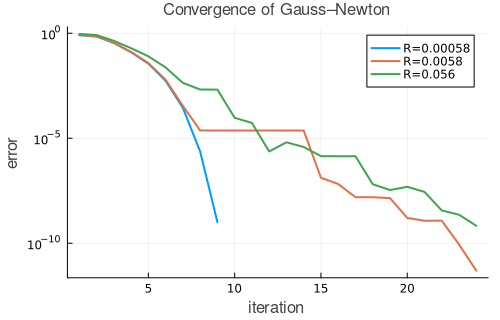

In [3]:
using Printf
plt = plot(xlabel="iteration", yaxis=(:log10, "error"),
    title="Convergence of Gauss–Newton")
for R in [1e-3, 1e-2, 1e-1]
    # Define the perturbed function.
    f(x) = g(x) - g(p) + R * normalize([-1, 1, -1])
    x = FNC.levenberg(f, [0, 0])
    r = x[end]
    err = [norm(x - r) for x in x[1:end-1]]
    normres = norm(f(r))
    plot!(err, label=@sprintf("R=%.2g", normres))
end
plt

In the least perturbed case, where the minimized residual is less than $10^{-3}$, the convergence is plausibly quadratic. At the next level up, the convergence starts similarly but suddenly stagnates for a long time. In the most perturbed case, the quadratic phase is nearly gone and the overall shape looks linear.